In [4]:
import geopandas as gpd
import pandas as pd
import os

In [5]:
folder_path = './districts_geojson'

In [30]:
geojson_file = folder_path + '/WESTERN-RUKUM.geojson'

In [31]:
# Read the GeoJSON file
gdf = gpd.read_file(geojson_file)
gdf


,DISTRICT,HQ,PROVINCE,geometry
0,WESTERN RUKUM,MUSIKOT,6,"POLYGON ((82.57589 28.98740, 82.58071 28.98542..."


In [37]:
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.ops import unary_union

# Replace with your actual file paths
geojson_file_1 = './districts_geojson/WESTERN-RUKUM.geojson'
geojson_file_2 = './districts_geojson/EASTERN-RUKUM.geojson'

# Read the GeoJSON files
gdf1 = gpd.read_file(geojson_file_1)
gdf2 = gpd.read_file(geojson_file_2)

# Function to extract exterior coordinates
def extract_exterior_coords(geometry):
    if geometry.type == 'Polygon':
        return list(geometry.exterior.coords)
    elif geometry.type == 'MultiPolygon':
        coords = []
        for polygon in geometry.geoms:
            coords.extend(polygon.exterior.coords)
        return coords
    else:
        raise ValueError("Unsupported geometry type: {}".format(geometry.type))

# Extract exterior coordinates from both GeoDataFrames
coords1 = gdf1.geometry.apply(extract_exterior_coords).explode().tolist()
coords2 = gdf2.geometry.apply(extract_exterior_coords).explode().tolist()

# Convert coordinate tuples to sets for comparison
set1 = set(coords1)
set2 = set(coords2)

# Compute Union and Intersection
union_coords = set1.union(set2)
intersection_coords = set1.intersection(set2)

# Compute Union Minus Intersection
result_coords = union_coords - intersection_coords

# Filter out coordinate sets that do not form valid polygons
valid_polygons = []
for coord_set in result_coords:
    # Ensure that the coordinate set contains at least 4 distinct points
    if len(set(coord_set)) >= 4:
        # Create a polygon from the coordinate set
        valid_polygons.append(Polygon(coord_set))

# Create a GeoDataFrame from valid polygons
result_gdf = gpd.GeoDataFrame(geometry=valid_polygons)

# Save the result to a new GeoJSON file (if desired)
result_gdf.to_file('result.geojson', driver='GeoJSON')

print("Resulting coordinates after A U B - (A ∩ B):")
print(result_coords)


Resulting coordinates after A U B - (A ∩ B):
{(82.510681, 28.925086), (82.549476, 28.523773), (83.039115, 28.795444), (82.264999, 28.701799), (82.23838, 28.704891), (82.580711, 28.985422), (82.54029, 28.538351), (82.472488, 28.528028), (82.754989, 28.824249), (82.916618, 28.539382), (83.037788, 28.623434), (82.395698, 28.527027), (82.819442, 28.485851), (82.916954, 28.528774), (82.558944, 28.521919), (82.190246, 28.63661), (82.254447, 28.597753), (82.43721, 28.857225), (82.668449, 28.950031), (82.529617, 28.967145), (82.535408, 28.971784), (82.888076, 28.507247), (82.236701, 28.700019), (83.140045, 28.742832), (82.236022, 28.697156), (83.105087, 28.63315), (82.969215, 28.580127), (82.972145, 28.579269), (82.746131, 28.840852), (82.521438, 28.554788), (82.287094, 28.753797), (82.554206, 28.521926), (82.893585, 28.515853), (82.884864, 28.47713), (82.416389, 28.530107), (82.386657, 28.829629), (82.516853, 28.955621), (82.446716, 28.865304), (83.14344, 28.681818), (82.505142, 28.921197), (

C:\Users\compu\AppData\Local\Temp\ipykernel_25156\2620907116.py:15: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == 'Polygon':
C:\Users\compu\AppData\Local\Temp\ipykernel_25156\2620907116.py:15: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == 'Polygon':
c:\Users\compu\anaconda3\envs\test\Lib\site-packages\geopandas\io\file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


In [57]:
import json
import numpy as np

# Function to create the GeoJSON feature dictionary
def create_feature(coords):
    return list(coords)

# Create a list of features
# Create a list of features
features = []
for idx, coord_set in enumerate(result_coords):
# Ensure that the coordinate set contains at least 4 distinct points
# if len(set(coord_set)) >= 4:
    # print(f"Coordinates for feature {idx}: {coord_set}")  # Debugging line
    # Create a feature from the coordinate set
    feature = create_feature(coord_set)
    features.append(feature)


data = {
    "type":"FeatureCollection",
    "features":[{
        "type":"Feature",
        "id":57,
        "properties":{
            "DISTRICT":"WESTERN RUKUM",
            "HQ":"MUSIKOT",
            "PROVINCE":6},
            "geometry":{
                "type":"Polygon",
                "coordinates":[[features]]
                }
            }
        ]
    }


# Save the FeatureCollection to a GeoJSON file
with open("result.geojson", "w") as outfile:
    json.dump(data, outfile, indent=2)

print(data)
print("GeoJSON file 'result.geojson' created successfully.")


{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 57, 'properties': {'DISTRICT': 'WESTERN RUKUM', 'HQ': 'MUSIKOT', 'PROVINCE': 6}, 'geometry': {'type': 'Polygon', 'coordinates': [[[[82.510681, 28.925086], [82.549476, 28.523773], [83.039115, 28.795444], [82.264999, 28.701799], [82.23838, 28.704891], [82.580711, 28.985422], [82.54029, 28.538351], [82.472488, 28.528028], [82.754989, 28.824249], [82.916618, 28.539382], [83.037788, 28.623434], [82.395698, 28.527027], [82.819442, 28.485851], [82.916954, 28.528774], [82.558944, 28.521919], [82.190246, 28.63661], [82.254447, 28.597753], [82.43721, 28.857225], [82.668449, 28.950031], [82.529617, 28.967145], [82.535408, 28.971784], [82.888076, 28.507247], [82.236701, 28.700019], [83.140045, 28.742832], [82.236022, 28.697156], [83.105087, 28.63315], [82.969215, 28.580127], [82.972145, 28.579269], [82.746131, 28.840852], [82.521438, 28.554788], [82.287094, 28.753797], [82.554206, 28.521926], [82.893585, 28.515853], [82.884864, 2

In [59]:
gdf = gpd.read_file("./result.geojson")
gdf

,DISTRICT,HQ,PROVINCE,geometry
0,WESTERN RUKUM,MUSIKOT,6,"POLYGON ((82.51068 28.92509, 82.54948 28.52377..."


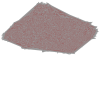

In [64]:
gdf['geometry'][0]